# Neural Network from Scratch

A neural network made from scratch using only Numpy (no PyTorch or TensorFlow).
This neural network is trained and tested on the classic MNIST dataset.

Detailed about MNIST can be found here: https://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0

In [5]:
X_train[:, 0].shape

(784,)

In [6]:
X_train.dtype, Y_train.dtype

(dtype('float64'), dtype('int64'))

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2  
    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy:  ", get_accuracy(predictions, Y), "\n")
            
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.10)

Iteration:  0
Accuracy:   0.10234146341463414 

Iteration:  50
Accuracy:   0.5109024390243903 

Iteration:  100
Accuracy:   0.6360487804878049 

Iteration:  150
Accuracy:   0.7065609756097561 

Iteration:  200
Accuracy:   0.7468780487804878 

Iteration:  250
Accuracy:   0.7719268292682927 

Iteration:  300
Accuracy:   0.7904390243902439 

Iteration:  350
Accuracy:   0.8054634146341464 

Iteration:  400
Accuracy:   0.8176829268292682 

Iteration:  450
Accuracy:   0.8277317073170731 

Iteration:  500
Accuracy:   0.8366829268292683 

Iteration:  550
Accuracy:   0.8439756097560975 

Iteration:  600
Accuracy:   0.8491219512195122 

Iteration:  650
Accuracy:   0.8535853658536585 

Iteration:  700
Accuracy:   0.8577560975609756 

Iteration:  750
Accuracy:   0.8611219512195122 

Iteration:  800
Accuracy:   0.8653414634146341 

Iteration:  850
Accuracy:   0.8687560975609756 

Iteration:  900
Accuracy:   0.8713170731707317 

Iteration:  950
Accuracy:   0.8737317073170732 



In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print("Prediction: ", prediction.item())
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  8
Label:  8


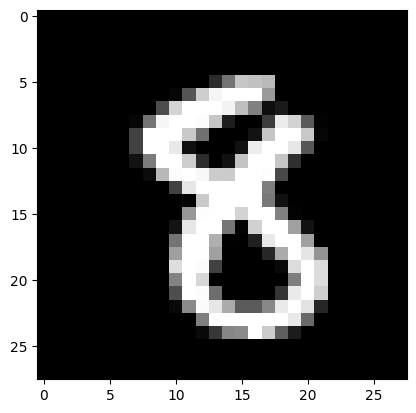

Prediction:  2
Label:  2


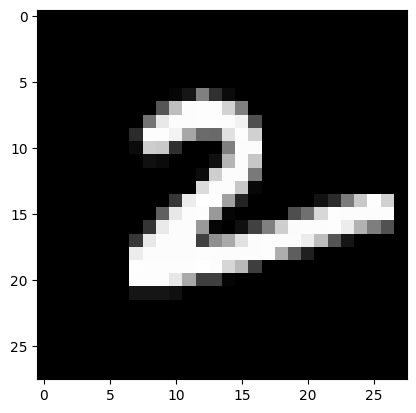

Prediction:  9
Label:  9


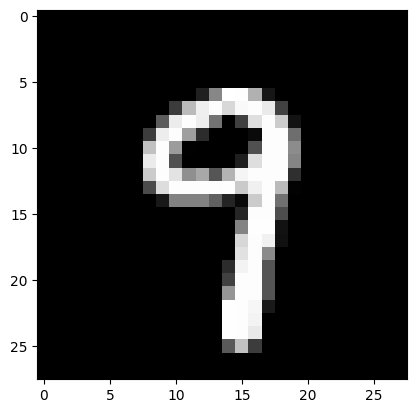

Prediction:  3
Label:  3


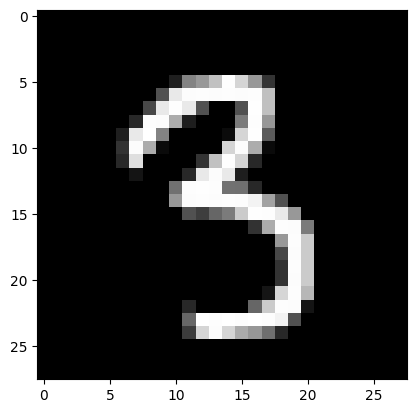

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Model Accuracy: ", get_accuracy(dev_predictions, Y_dev))

Model Accuracy:  0.872
